In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
ROOT.gStyle.SetOptStat(0)

In [3]:
df_pipkmks_spring = tools.get_dataframe('pipkmks', 'spring', 'data')
df_pipkmks_fall = tools.get_dataframe('pipkmks', 'fall', 'data')
df_pipkmks_2017 = tools.get_dataframe('pipkmks', '2017', 'data')
df_pimkpks_spring = tools.get_dataframe('pimkpks', 'spring', 'data')
df_pimkpks_fall = tools.get_dataframe('pimkpks', 'fall', 'data')
df_pimkpks_2017 = tools.get_dataframe('pimkpks', '2017', 'data')

In [4]:
df_pipkmks_spring = df_pipkmks_spring.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS).Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS)
df_pipkmks_fall = df_pipkmks_fall.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS).Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS)
df_pipkmks_2017 = df_pipkmks_2017.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS).Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS)
df_pimkpks_spring = df_pimkpks_spring.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS).Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS)
df_pimkpks_fall = df_pimkpks_fall.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS).Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS)
df_pimkpks_2017 = df_pimkpks_2017.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS).Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS)

In [5]:
df_pipkmks_spring = df_pipkmks_spring.Define('km_p', 'Numba::get_p(km_px, km_py, km_pz)').Define('km_theta', 'Numba::get_theta(km_px, km_py, km_pz)').Define('km_phi', 'Numba::get_phi(km_px, km_py)')
df_pipkmks_fall = df_pipkmks_fall.Define('km_p', 'Numba::get_p(km_px, km_py, km_pz)').Define('km_theta', 'Numba::get_theta(km_px, km_py, km_pz)').Define('km_phi', 'Numba::get_phi(km_px, km_py)')
df_pipkmks_2017 = df_pipkmks_2017.Define('km_p', 'Numba::get_p(km_px, km_py, km_pz)').Define('km_theta', 'Numba::get_theta(km_px, km_py, km_pz)').Define('km_phi', 'Numba::get_phi(km_px, km_py)')
df_pipkmks_spring = df_pipkmks_spring.Define('pip1_p', 'Numba::get_p(pip1_px, pip1_py, pip1_pz)').Define('pip1_theta', 'Numba::get_theta(pip1_px, pip1_py, pip1_pz)').Define('pip1_phi', 'Numba::get_phi(pip1_px, pip1_py)')
df_pipkmks_fall = df_pipkmks_fall.Define('pip1_p', 'Numba::get_p(pip1_px, pip1_py, pip1_pz)').Define('pip1_theta', 'Numba::get_theta(pip1_px, pip1_py, pip1_pz)').Define('pip1_phi', 'Numba::get_phi(pip1_px, pip1_py)')
df_pipkmks_2017 = df_pipkmks_2017.Define('pip1_p', 'Numba::get_p(pip1_px, pip1_py, pip1_pz)').Define('pip1_theta', 'Numba::get_theta(pip1_px, pip1_py, pip1_pz)').Define('pip1_phi', 'Numba::get_phi(pip1_px, pip1_py)')
df_pipkmks_spring = df_pipkmks_spring.Define('pip2_p', 'Numba::get_p(pip2_px, pip2_py, pip2_pz)').Define('pip2_theta', 'Numba::get_theta(pip2_px, pip2_py, pip2_pz)').Define('pip2_phi', 'Numba::get_phi(pip2_px, pip2_py)')
df_pipkmks_fall = df_pipkmks_fall.Define('pip2_p', 'Numba::get_p(pip2_px, pip2_py, pip2_pz)').Define('pip2_theta', 'Numba::get_theta(pip2_px, pip2_py, pip2_pz)').Define('pip2_phi', 'Numba::get_phi(pip2_px, pip2_py)')
df_pipkmks_2017 = df_pipkmks_2017.Define('pip2_p', 'Numba::get_p(pip2_px, pip2_py, pip2_pz)').Define('pip2_theta', 'Numba::get_theta(pip2_px, pip2_py, pip2_pz)').Define('pip2_phi', 'Numba::get_phi(pip2_px, pip2_py)')
df_pipkmks_spring = df_pipkmks_spring.Define('pim_p', 'Numba::get_p(pim_px, pim_py, pim_pz)').Define('pim_theta', 'Numba::get_theta(pim_px, pim_py, pim_pz)').Define('pim_phi', 'Numba::get_phi(pim_px, pim_py)')
df_pipkmks_fall = df_pipkmks_fall.Define('pim_p', 'Numba::get_p(pim_px, pim_py, pim_pz)').Define('pim_theta', 'Numba::get_theta(pim_px, pim_py, pim_pz)').Define('pim_phi', 'Numba::get_phi(pim_px, pim_py)')
df_pipkmks_2017 = df_pipkmks_2017.Define('pim_p', 'Numba::get_p(pim_px, pim_py, pim_pz)').Define('pim_theta', 'Numba::get_theta(pim_px, pim_py, pim_pz)').Define('pim_phi', 'Numba::get_phi(pim_px, pim_py)')
df_pipkmks_spring = df_pipkmks_spring.Define('ks_p', 'Numba::get_p(ks_px, ks_py, ks_pz)').Define('ks_theta', 'Numba::get_theta(ks_px, ks_py, ks_pz)').Define('ks_phi', 'Numba::get_phi(ks_px, ks_py)')
df_pipkmks_fall = df_pipkmks_fall.Define('ks_p', 'Numba::get_p(ks_px, ks_py, ks_pz)').Define('ks_theta', 'Numba::get_theta(ks_px, ks_py, ks_pz)').Define('ks_phi', 'Numba::get_phi(ks_px, ks_py)')
df_pipkmks_2017 = df_pipkmks_2017.Define('ks_p', 'Numba::get_p(ks_px, ks_py, ks_pz)').Define('ks_theta', 'Numba::get_theta(ks_px, ks_py, ks_pz)').Define('ks_phi', 'Numba::get_phi(ks_px, ks_py)')

df_pimkpks_spring = df_pimkpks_spring.Define('kp_p', 'Numba::get_p(kp_px, kp_py, kp_pz)').Define('kp_theta', 'Numba::get_theta(kp_px, kp_py, kp_pz)').Define('kp_phi', 'Numba::get_phi(kp_px, kp_py)')
df_pimkpks_fall = df_pimkpks_fall.Define('kp_p', 'Numba::get_p(kp_px, kp_py, kp_pz)').Define('kp_theta', 'Numba::get_theta(kp_px, kp_py, kp_pz)').Define('kp_phi', 'Numba::get_phi(kp_px, kp_py)')
df_pimkpks_2017 = df_pimkpks_2017.Define('kp_p', 'Numba::get_p(kp_px, kp_py, kp_pz)').Define('kp_theta', 'Numba::get_theta(kp_px, kp_py, kp_pz)').Define('kp_phi', 'Numba::get_phi(kp_px, kp_py)')
df_pimkpks_spring = df_pimkpks_spring.Define('pim1_p', 'Numba::get_p(pim1_px, pim1_py, pim1_pz)').Define('pim1_theta', 'Numba::get_theta(pim1_px, pim1_py, pim1_pz)').Define('pim1_phi', 'Numba::get_phi(pim1_px, pim1_py)')
df_pimkpks_fall = df_pimkpks_fall.Define('pim1_p', 'Numba::get_p(pim1_px, pim1_py, pim1_pz)').Define('pim1_theta', 'Numba::get_theta(pim1_px, pim1_py, pim1_pz)').Define('pim1_phi', 'Numba::get_phi(pim1_px, pim1_py)')
df_pimkpks_2017 = df_pimkpks_2017.Define('pim1_p', 'Numba::get_p(pim1_px, pim1_py, pim1_pz)').Define('pim1_theta', 'Numba::get_theta(pim1_px, pim1_py, pim1_pz)').Define('pim1_phi', 'Numba::get_phi(pim1_px, pim1_py)')
df_pimkpks_spring = df_pimkpks_spring.Define('pim2_p', 'Numba::get_p(pim2_px, pim2_py, pim2_pz)').Define('pim2_theta', 'Numba::get_theta(pim2_px, pim2_py, pim2_pz)').Define('pim2_phi', 'Numba::get_phi(pim2_px, pim2_py)')
df_pimkpks_fall = df_pimkpks_fall.Define('pim2_p', 'Numba::get_p(pim2_px, pim2_py, pim2_pz)').Define('pim2_theta', 'Numba::get_theta(pim2_px, pim2_py, pim2_pz)').Define('pim2_phi', 'Numba::get_phi(pim2_px, pim2_py)')
df_pimkpks_2017 = df_pimkpks_2017.Define('pim2_p', 'Numba::get_p(pim2_px, pim2_py, pim2_pz)').Define('pim2_theta', 'Numba::get_theta(pim2_px, pim2_py, pim2_pz)').Define('pim2_phi', 'Numba::get_phi(pim2_px, pim2_py)')
df_pimkpks_spring = df_pimkpks_spring.Define('pip_p', 'Numba::get_p(pip_px, pip_py, pip_pz)').Define('pip_theta', 'Numba::get_theta(pip_px, pip_py, pip_pz)').Define('pip_phi', 'Numba::get_phi(pip_px, pip_py)')
df_pimkpks_fall = df_pimkpks_fall.Define('pip_p', 'Numba::get_p(pip_px, pip_py, pip_pz)').Define('pip_theta', 'Numba::get_theta(pip_px, pip_py, pip_pz)').Define('pip_phi', 'Numba::get_phi(pip_px, pip_py)')
df_pimkpks_2017 = df_pimkpks_2017.Define('pip_p', 'Numba::get_p(pip_px, pip_py, pip_pz)').Define('pip_theta', 'Numba::get_theta(pip_px, pip_py, pip_pz)').Define('pip_phi', 'Numba::get_phi(pip_px, pip_py)')
df_pimkpks_spring = df_pimkpks_spring.Define('ks_p', 'Numba::get_p(ks_px, ks_py, ks_pz)').Define('ks_theta', 'Numba::get_theta(ks_px, ks_py, ks_pz)').Define('ks_phi', 'Numba::get_phi(ks_px, ks_py)')
df_pimkpks_fall = df_pimkpks_fall.Define('ks_p', 'Numba::get_p(ks_px, ks_py, ks_pz)').Define('ks_theta', 'Numba::get_theta(ks_px, ks_py, ks_pz)').Define('ks_phi', 'Numba::get_phi(ks_px, ks_py)')
df_pimkpks_2017 = df_pimkpks_2017.Define('ks_p', 'Numba::get_p(ks_px, ks_py, ks_pz)').Define('ks_theta', 'Numba::get_theta(ks_px, ks_py, ks_pz)').Define('ks_phi', 'Numba::get_phi(ks_px, ks_py)')

In [6]:
km_hists = []
kp_hists = []
for t in constants.ALLOWED_T_BINS:
    t_range_string = f'{constants.T_CUT_DICT[t][0]} < t < {constants.T_CUT_DICT[t][1]}'
    hist_km_spring = df_pipkmks_spring.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'km_theta_vs_p_t={t}_spring', 'K^{-} #Theta vs p for ' + t_range_string, 40, 0, 8, 20, 0, 20), 'km_p', 'km_theta')
    hist_km_fall = df_pipkmks_fall.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'km_theta_vs_p_t={t}_fall', 'K^{-} #Theta vs p for ' + t_range_string, 40, 0, 8, 20, 0, 20), 'km_p', 'km_theta')
    hist_km_2017 = df_pipkmks_2017.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'km_theta_vs_p_t={t}_2017', 'K^{-} #Theta vs p for ' + t_range_string, 40, 0, 8, 20, 0, 20), 'km_p', 'km_theta')
    hist_kp_spring = df_pimkpks_spring.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'kp_theta_vs_p_t={t}_spring', 'K^{+} #Theta vs p for ' + t_range_string, 40, 0, 8, 20, 0, 20), 'kp_p', 'kp_theta')
    hist_kp_fall = df_pimkpks_fall.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'kp_theta_vs_p_t={t}_fall', 'K^{+} #Theta vs p for ' + t_range_string, 40, 0, 8, 20, 0, 20), 'kp_p', 'kp_theta')
    hist_kp_2017 = df_pimkpks_2017.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'kp_theta_vs_p_t={t}_2017', 'K^{+} #Theta vs p for ' + t_range_string, 40, 0, 8, 20, 0, 20), 'kp_p', 'kp_theta')

    hist_kp_total = hist_kp_spring.Clone(f'kp_theta_vs_p_t={t}_total')
    hist_kp_total.Add(hist_kp_fall.GetPtr())
    hist_kp_total.Add(hist_kp_2017.GetPtr())

    hist_km_total = hist_km_spring.Clone(f'km_theta_vs_p_t={t}_total')
    hist_km_total.Add(hist_km_fall.GetPtr())
    hist_km_total.Add(hist_km_2017.GetPtr())

    kp_hists.append(hist_kp_total)
    km_hists.append(hist_km_total)
    


In [7]:
c = ROOT.TCanvas('c', 'c', 1200, 800)

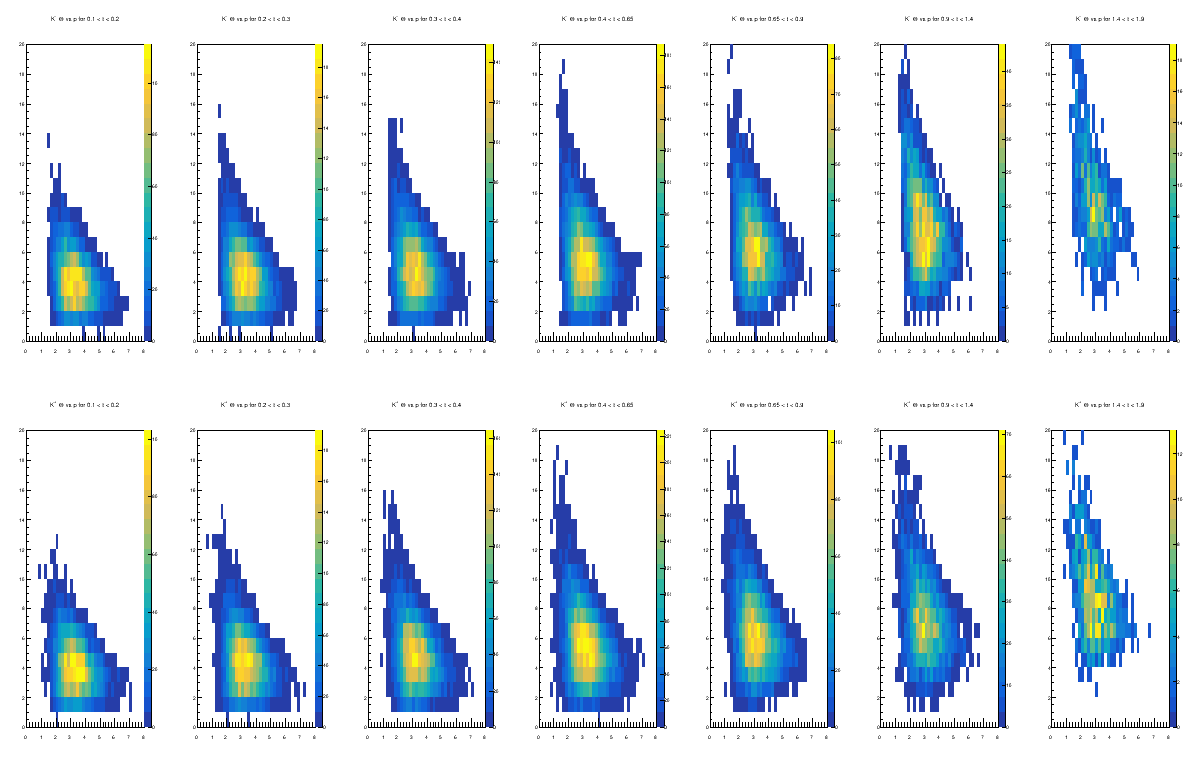

In [8]:
c.Divide(len(constants.ALLOWED_T_BINS), 2)
for i, (hist_km, hist_kp) in enumerate(zip(km_hists, kp_hists)):
    hist_km.SetLineColor(ROOT.kBlue)
    hist_kp.SetLineColor(ROOT.kRed)
    c.cd(i +1)
    hist_km.Draw('colz')
    c.cd(i + 1 + len(constants.ALLOWED_T_BINS))
    hist_kp.Draw('colz')
c.Draw()




In [9]:
# bad code but im in a hurry 
pip1_hists = []
pim1_hists = []
for t in constants.ALLOWED_T_BINS:
    t_range_string = f'{constants.T_CUT_DICT[t][0]} < t < {constants.T_CUT_DICT[t][1]}'
    pip1_hist_spring = df_pipkmks_spring.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pip1_theta_vs_p_t={t}_spring', '#pi^{+} #Theta vs p for ' + t_range_string, 40, 0, 8, 20, 0, 20,), 'pip1_p', 'pip1_theta')
    pip1_hist_fall = df_pipkmks_fall.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pip1_theta_vs_p_t={t}_fall', '#pi^{+} #Theta vs p for ' + t_range_string, 40, 0, 8, 20, 0, 20,), 'pip1_p', 'pip1_theta')
    pip1_hist_2017 = df_pipkmks_fall.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pip1_theta_vs_p_t={t}_fall', '#pi^{+} #Theta vs p for ' + t_range_string, 40, 0, 8, 20, 0, 20,), 'pip1_p', 'pip1_theta')
    pim1_hist_spring = df_pimkpks_spring.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pim1_theta_vs_p_t={t}_spring', '#pi^{-} #Theta vs p for ' + t_range_string, 40, 0, 8, 20, 0, 20), 'pim1_p', 'pim1_theta')
    pim1_hist_fall = df_pimkpks_fall.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pim1_theta_vs_p_t={t}_fall', '#pi^{-} #Theta vs p for ' + t_range_string, 40, 0, 8, 20, 0, 20), 'pim1_p', 'pim1_theta')
    pim1_hist_2017 = df_pimkpks_fall.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pim1_theta_vs_p_t={t}_fall', '#pi^{-} #Theta vs p for ' + t_range_string, 40, 0, 8, 20, 0, 20), 'pim1_p', 'pim1_theta')

    pip1_hist_total = pip1_hist_spring.Clone(f'pip1_theta_vs_p_t={t}_total')
    pip1_hist_total.Add(pip1_hist_fall.GetPtr())
    pip1_hist_total.Add(pip1_hist_2017.GetPtr())

    pim1_hist_total = pim1_hist_spring.Clone(f'pim1_theta_vs_p_t={t}_total')
    pim1_hist_total.Add(pim1_hist_fall.GetPtr())
    pim1_hist_total.Add(pim1_hist_2017.GetPtr())

    pip1_hists.append(pip1_hist_total)
    pim1_hists.append(pim1_hist_total)


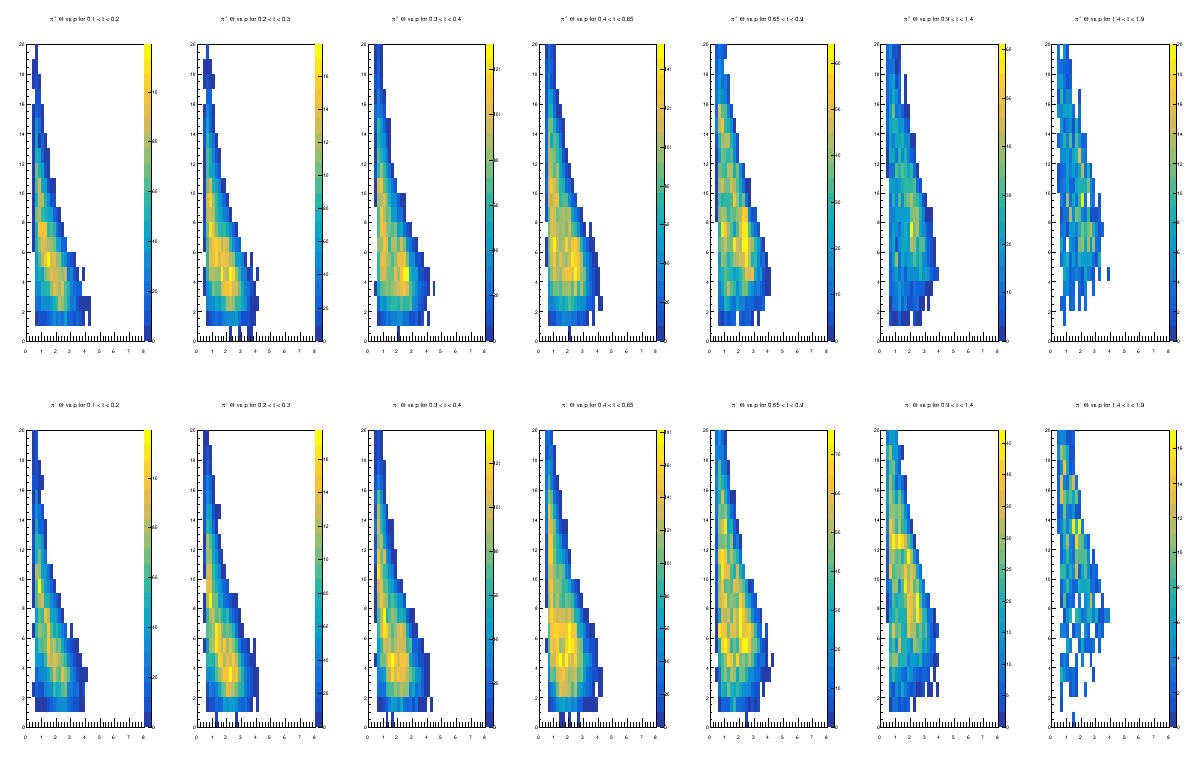

In [10]:
for i, (hist_pip1, hist_pim1) in enumerate(zip(pip1_hists, pim1_hists)):
    hist_pip1.SetLineColor(ROOT.kBlue)
    hist_pim1.SetLineColor(ROOT.kRed)
    c.cd(i +1)
    hist_pip1.Draw('colz')
    c.cd(i + 1 + len(constants.ALLOWED_T_BINS))
    hist_pim1.Draw('colz')
c.Draw()

In [11]:
pip_ks_hists = []
pim_ks_hists = []
for t in constants.ALLOWED_T_BINS:
    t_range_string = f'{constants.T_CUT_DICT[t][0]} < t < {constants.T_CUT_DICT[t][1]}'
    pip_ks_hist_spring = df_pipkmks_spring.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pipkmks_ks_theta_vs_p_t={t}_spring', 'K_{s} #Theta vs p for ' + t_range_string + 'for channel #pi{+}K^{-}', 40, 0, 8, 20, 0, 20,), 'ks_p', 'ks_theta')
    pip_ks_hist_fall = df_pipkmks_fall.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pipkmks_ks_theta_vs_p_t={t}_fall', 'K_{s} #Theta vs p for ' + t_range_string + 'for channel #pi{+}K^{-}', 40, 0, 8, 20, 0, 20,), 'ks_p', 'ks_theta')
    pip_ks_hist_2017 = df_pipkmks_2017.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pipkmks_ks_theta_vs_p_t={t}_2017', 'K_{s} #Theta vs p for ' + t_range_string + 'for channel #pi{+}K^{-}', 40, 0, 8, 20, 0, 20,), 'ks_p', 'ks_theta')
    pim_ks_hist_spring = df_pimkpks_spring.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pimkpks_ks_theta_vs_p_t={t}_spring', 'K_{s} #Theta vs p for ' + t_range_string + 'for channel #pi{-}K^{+}', 40, 0, 8, 20, 0, 20), 'ks_p', 'ks_theta')
    pim_ks_hist_fall = df_pimkpks_fall.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pimkpks_ks_theta_vs_p_t={t}_fall', 'K_{s} #Theta vs p for ' + t_range_string + 'for channel #pi{-}K^{+}', 40, 0, 8, 20, 0, 20), 'ks_p', 'ks_theta')
    pim_ks_hist_2017 = df_pimkpks_2017.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pimkpks_ks_theta_vs_p_t={t}_2017', 'K_{s} #Theta vs p for ' + t_range_string + 'for channel #pi{-}K^{+}', 40, 0, 8, 20, 0, 20), 'ks_p', 'ks_theta')

    pip_ks_hist_total = pip_ks_hist_spring.Clone(f'pipkmks_ks_theta_vs_p_t={t}_total')
    pip_ks_hist_total.Add(pip_ks_hist_fall.GetPtr())
    pip_ks_hist_total.Add(pip_ks_hist_2017.GetPtr())

    pim_ks_hist_total = pim_ks_hist_spring.Clone(f'pimkpks_ks_theta_vs_p_t={t}_total')
    pim_ks_hist_total.Add(pim_ks_hist_fall.GetPtr())
    pim_ks_hist_total.Add(pim_ks_hist_2017.GetPtr())

    pip_ks_hists.append(pip_ks_hist_total)
    pim_ks_hists.append(pim_ks_hist_total)
    

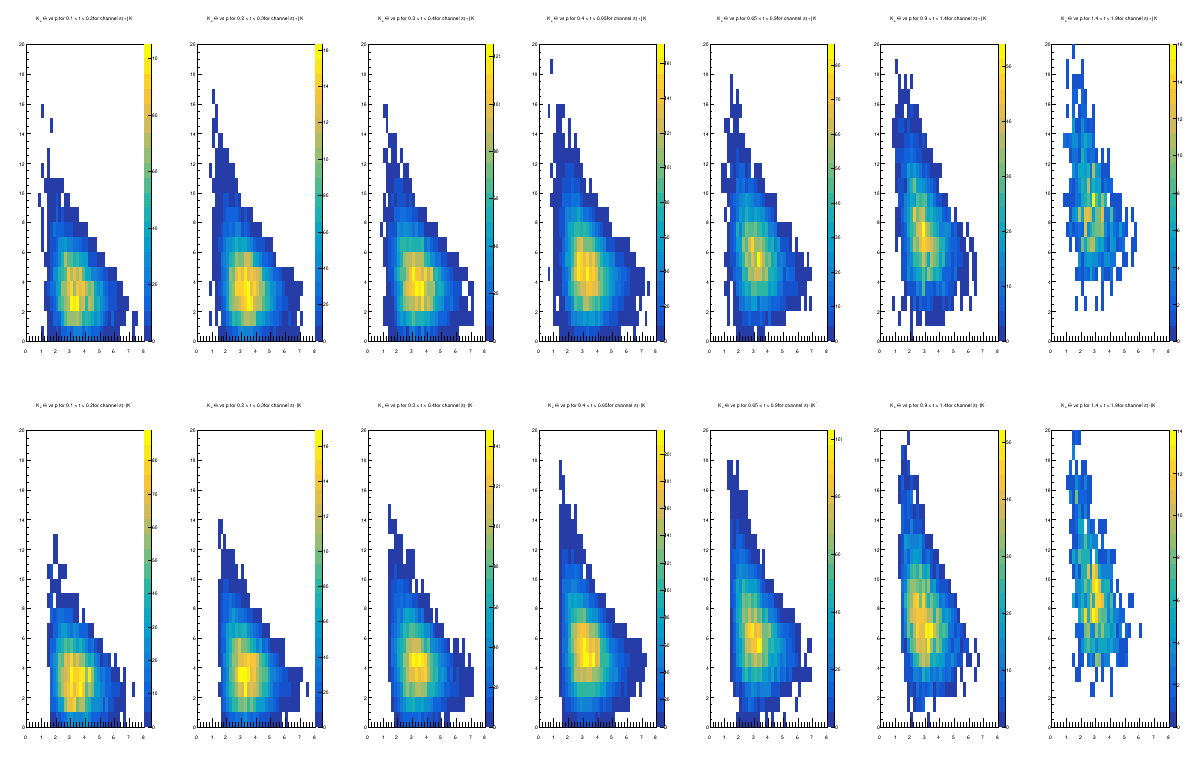

In [12]:
for i, (hist_pip_ks, hist_pim_ks) in enumerate(zip(pip_ks_hists, pim_ks_hists)):
    hist_pip_ks.SetLineColor(ROOT.kBlue)
    hist_pim_ks.SetLineColor(ROOT.kRed)
    c.cd(i +1)
    hist_pip_ks.Draw('colz')
    c.cd(i + 1 + len(constants.ALLOWED_T_BINS))
    hist_pim_ks.Draw('colz')
c.Draw()

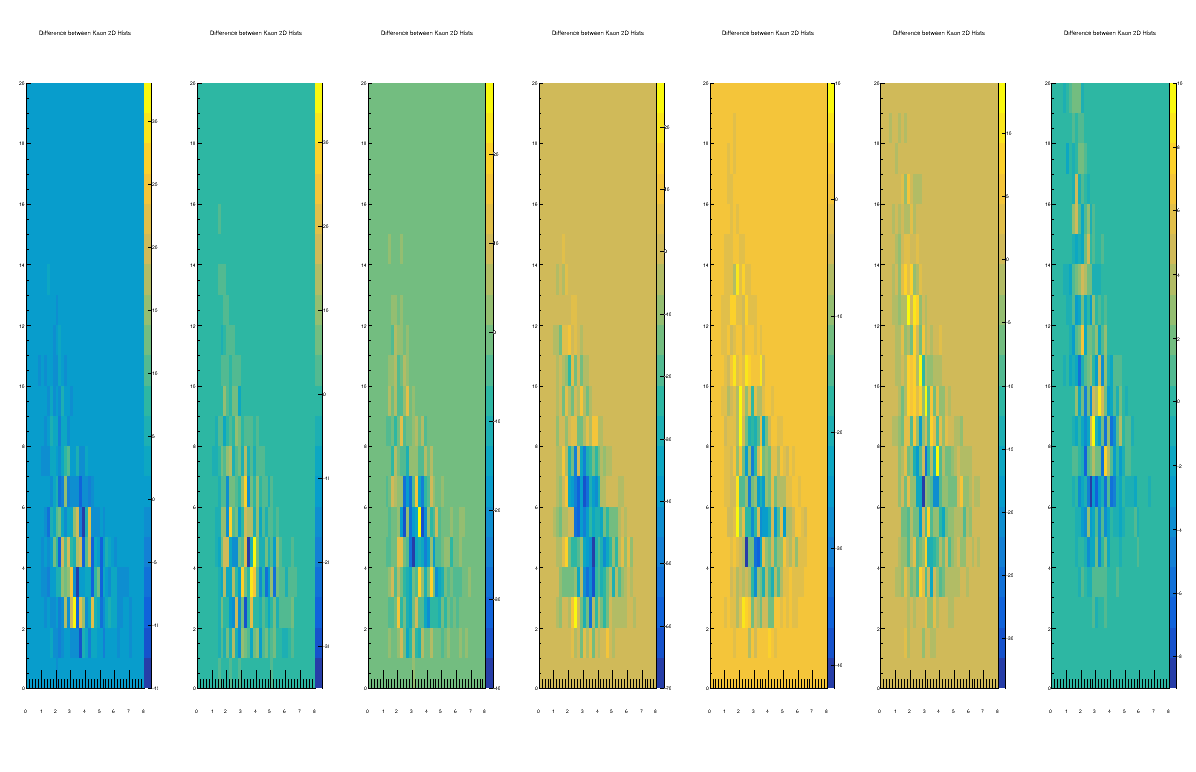

In [13]:
c1 = ROOT.TCanvas('c1', 'c1', 1200, 800)
c1.Divide(7, 1)
hist_diffs = []
for i, (hist_km, hist_kp) in enumerate(zip(km_hists, kp_hists)):
    c1.cd(i+1)
    hist_diff = hist_km.Clone(f'kmkp_diff_t={constants.ALLOWED_T_BINS[i]}')
    hist_diff.Add(hist_kp, -1)
    hist_diff.SetTitle('Difference between Kaon 2D Hists')
    hist_diffs.append(hist_diff)
    hist_diffs[i].Draw('colz')
c1.Draw()

In [32]:
km_p_hists = []
kp_p_hists = []
for t in constants.ALLOWED_T_BINS:
    t_range_string = f'{constants.T_CUT_DICT[t][0]} < t < {constants.T_CUT_DICT[t][1]}'
    km_p_hist_spring = df_pipkmks_spring.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pipkmks_ks_p_t={t}_spring', 'K_{-} #vec{p} for ' + t_range_string + 'for channel #pi{+}K^{-}', 40, 0, 8), 'km_p')
    km_p_hist_fall = df_pipkmks_fall.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pipkmks_ks_p_t={t}_fall', 'K_{-} #vec{p} for ' + t_range_string + 'for channel #pi{+}K^{-}', 40, 0, 8), 'km_p')
    km_p_hist_2017 = df_pipkmks_2017.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pipkmks_ks_p_t={t}_2017', 'K_{-} #vec{p} for ' + t_range_string + 'for channel #pi{+}K^{-}', 40, 0, 8), 'km_p')
    kp_p_hist_spring = df_pimkpks_spring.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pimkpks_ks_p_t={t}_spring', 'K_{+} #vec{p} for ' + t_range_string + 'for channel #pi{-}K^{+}', 40, 0, 8), 'kp_p')
    kp_p_hist_fall = df_pimkpks_fall.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pimkpks_ks_p_t={t}_fall', 'K_{+} #vec{p} for ' + t_range_string + 'for channel #pi{-}K^{+}', 40, 0, 8), 'kp_p')
    kp_p_hist_2017 = df_pimkpks_2017.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pimkpks_ks_p_t={t}_2017', 'K_{+} #vec{p} for ' + t_range_string + 'for channel #pi{-}K^{+}', 40, 0, 8), 'kp_p')

    km_p_hist_total = km_p_hist_spring.Clone(f'pipkmks_km_p_t={t}_total')
    km_p_hist_total.Add(km_p_hist_fall.GetPtr())
    km_p_hist_total.Add(km_p_hist_2017.GetPtr())

    kp_p_hist_total = kp_p_hist_spring.Clone(f'pimkpks_kp_p_t={t}_total')
    kp_p_hist_total.Add(kp_p_hist_fall.GetPtr())
    kp_p_hist_total.Add(kp_p_hist_2017.GetPtr())

    km_p_hists.append(km_p_hist_total)
    kp_p_hists.append(kp_p_hist_total)


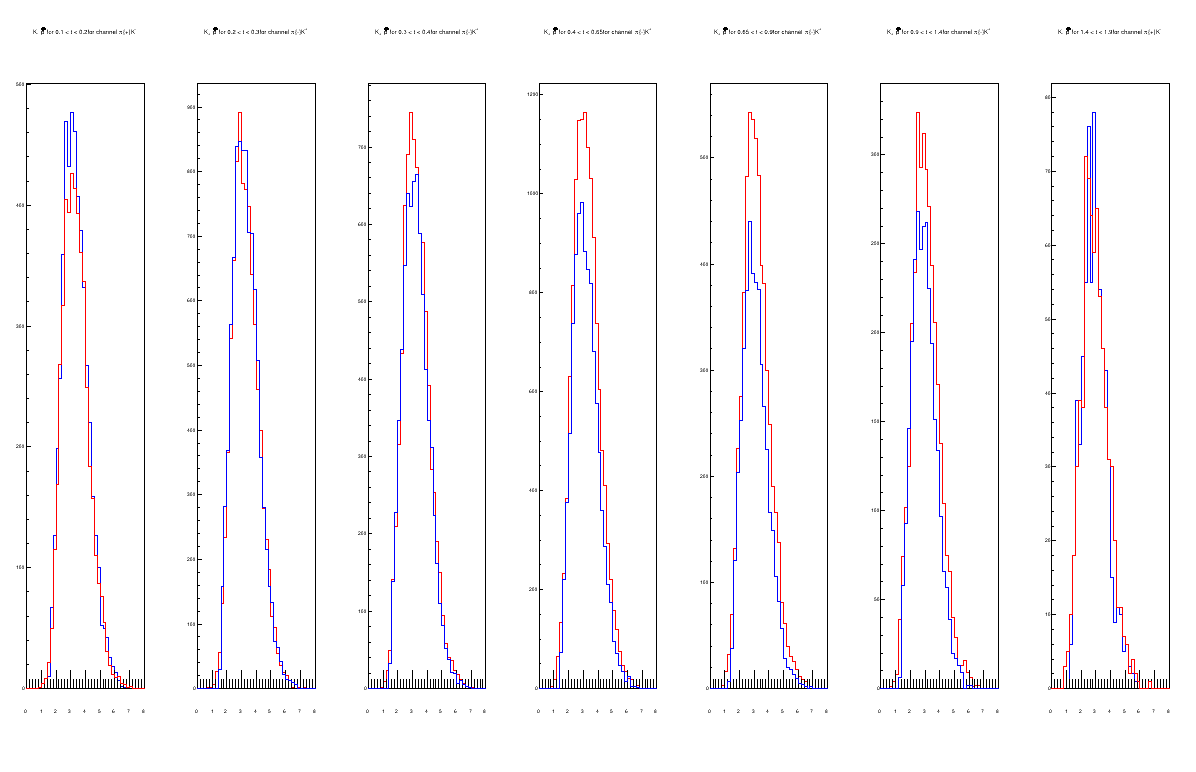

In [33]:
for i, (hist_km, hist_kp) in enumerate(zip(km_p_hists, kp_p_hists)):
    
    hist_km.SetLineColor(ROOT.kBlue)
    hist_kp.SetLineColor(ROOT.kRed)
    c1.cd(i +1)
    sorted_hists = tools.sort_hists_by_max([hist_km, hist_kp])
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
c1.Draw()

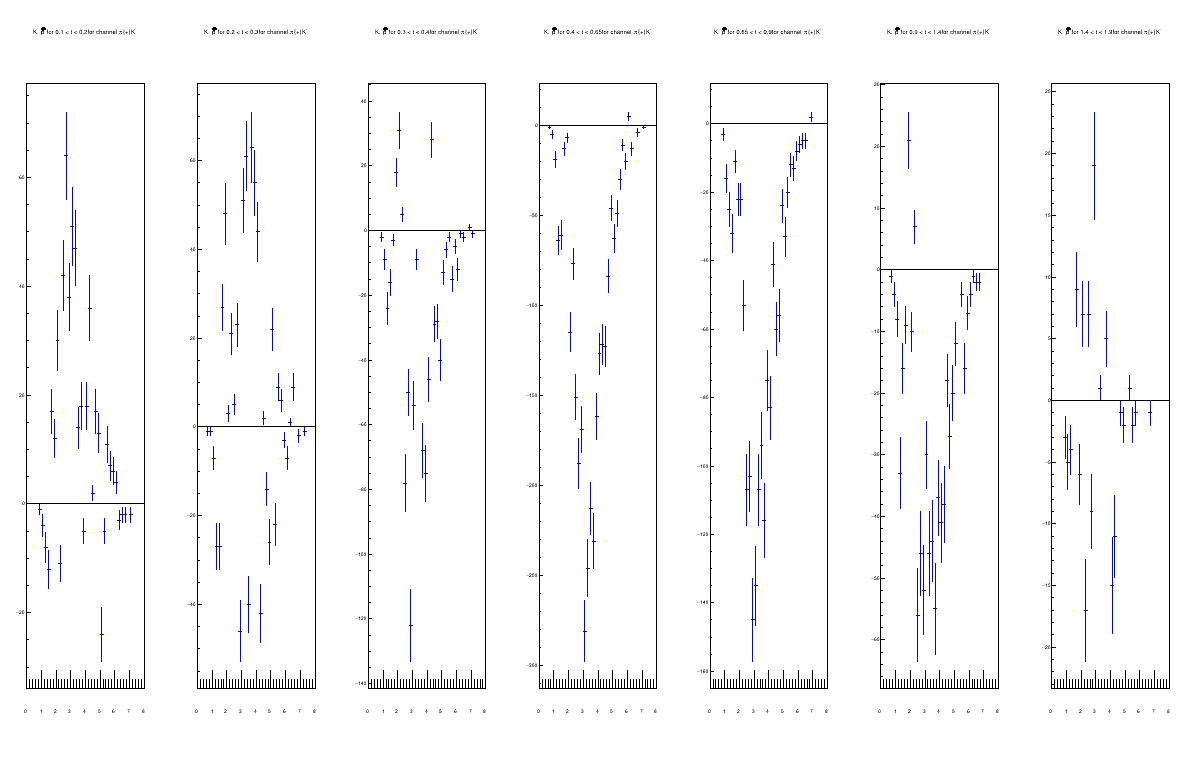

In [34]:
k_p_diff = []
zero_line_p = ROOT.TLine(0, 0, 8, 0)
zero_line_p.SetLineWidth(1)
for i, (hist_km, hist_kp) in enumerate(zip(km_p_hists, kp_p_hists)):
    kaon_p_diff = hist_km.Clone(f'kaon_p_diff_t={constants.ALLOWED_T_BINS[i]}')
    kaon_p_diff.Add(hist_kp, -1)
    k_p_diff.append(kaon_p_diff)
    c1.cd(i +1)
    k_p_diff[i].Draw('e')
    zero_line_p.Draw('same')
c1.Draw()

In [35]:
km_theta_hists = []
kp_theta_hists = []
for t in constants.ALLOWED_T_BINS:
    t_range_string = f'{constants.T_CUT_DICT[t][0]} < t < {constants.T_CUT_DICT[t][1]}'
    km_theta_hist_spring = df_pipkmks_spring.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pipkmks_ks_theta_t={t}_spring', 'K_{-} #Theta for ' + t_range_string + 'for channel #pi{+}K^{-}', 20, 0, 20), 'km_theta')
    km_theta_hist_fall = df_pipkmks_fall.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pipkmks_ks_theta_t={t}_fall', 'K_{-} #Theta for ' + t_range_string + 'for channel #pi{+}K^{-}', 20, 0, 20), 'km_theta')
    km_theta_hist_2017 = df_pipkmks_2017.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pipkmks_ks_theta_t={t}_2017', 'K_{-} #Theta for ' + t_range_string + 'for channel #pi{+}K^{-}', 20, 0, 20), 'km_theta')
    kp_theta_hist_spring = df_pimkpks_spring.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pimkpks_ks_theta_t={t}_spring', 'K_{+} #Theta for ' + t_range_string + 'for channel #pi{-}K^{+}', 20, 0, 20), 'kp_theta')
    kp_theta_hist_fall = df_pimkpks_fall.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pimkpks_ks_theta_t={t}_fall', 'K_{+} #Theta for ' + t_range_string + 'for channel #pi{-}K^{+}', 20, 0, 20), 'kp_theta')
    kp_theta_hist_2017 = df_pimkpks_2017.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pimkpks_ks_theta_t={t}_2017', 'K_{+} #Theta for ' + t_range_string + 'for channel #pi{-}K^{+}', 20, 0, 20), 'kp_theta')

    km_theta_hist_total = km_theta_hist_spring.Clone(f'pipkmks_km_theta_t={t}_total')
    km_theta_hist_total.Add(km_theta_hist_fall.GetPtr())
    km_theta_hist_total.Add(km_theta_hist_2017.GetPtr())

    kp_theta_hist_total = kp_theta_hist_spring.Clone(f'pimkpks_kp_theta_t={t}_total')
    kp_theta_hist_total.Add(kp_theta_hist_fall.GetPtr())
    kp_theta_hist_total.Add(kp_theta_hist_2017.GetPtr())

    km_theta_hists.append(km_theta_hist_total)
    kp_theta_hists.append(kp_theta_hist_total)

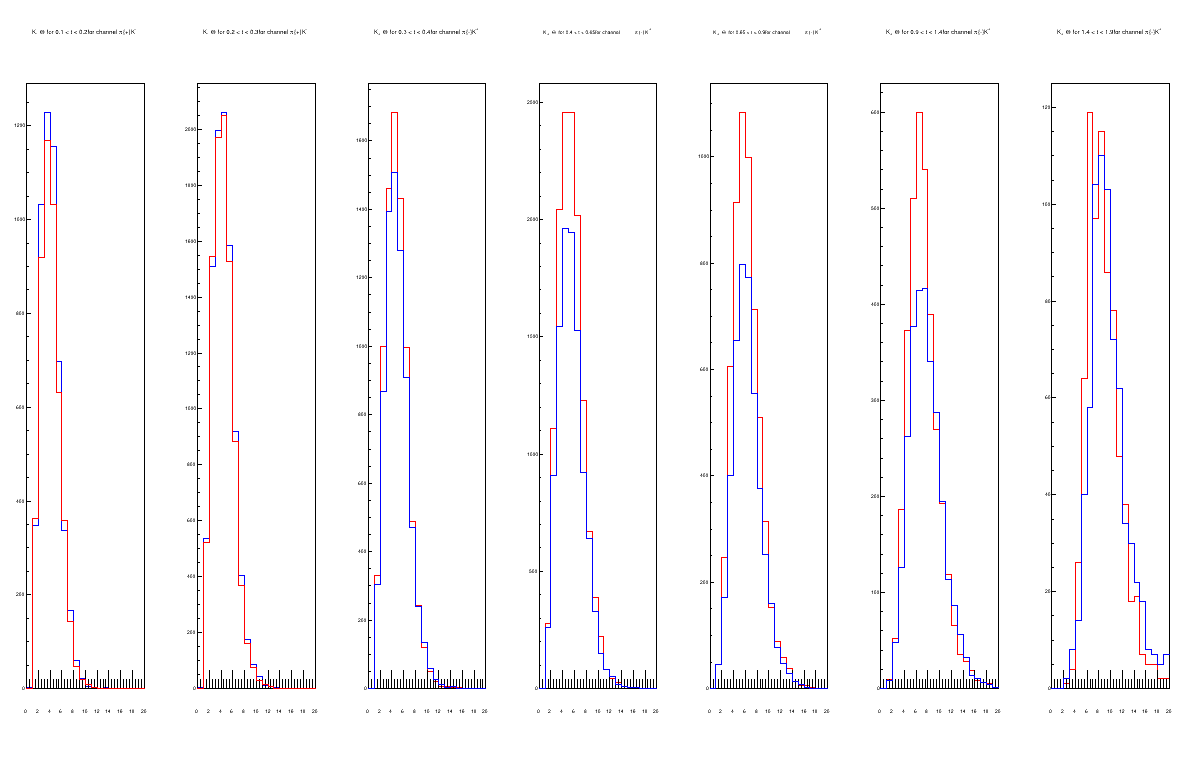

In [36]:
for i, (hist_km, hist_kp) in enumerate(zip(km_theta_hists, kp_theta_hists)):
    
    hist_km.SetLineColor(ROOT.kBlue)
    hist_kp.SetLineColor(ROOT.kRed)
    c1.cd(i +1)
    sorted_hists = tools.sort_hists_by_max([hist_km, hist_kp])
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
c1.Draw()

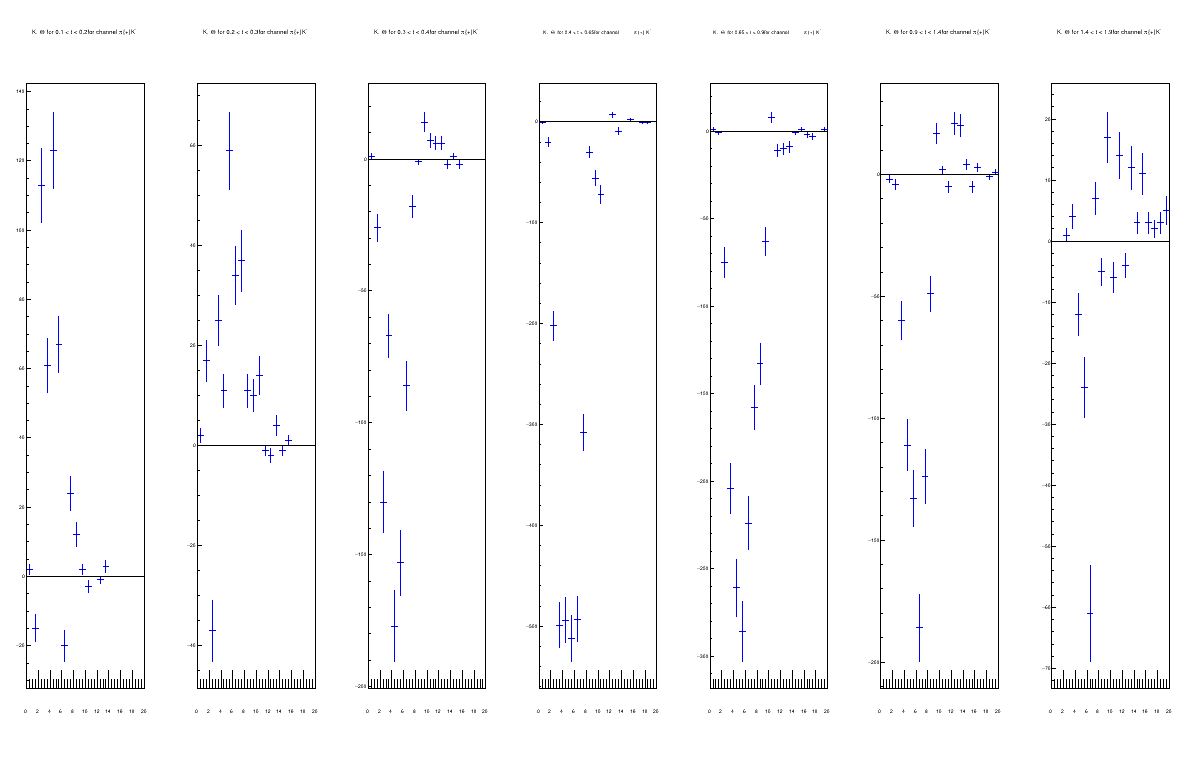

In [37]:
k_theta_diff = []
zero_line_theta = ROOT.TLine(0, 0, 20, 0)
zero_line_theta.SetLineWidth(1)
for i, (hist_km, hist_kp) in enumerate(zip(km_theta_hists, kp_theta_hists)):
    kaon_theta_diff = hist_km.Clone(f'kaon_theta_diff_t={constants.ALLOWED_T_BINS[i]}')
    kaon_theta_diff.Add(hist_kp, -1)
    k_theta_diff.append(kaon_theta_diff)
    c1.cd(i +1)
    k_theta_diff[i].Draw('e')
    zero_line_theta.Draw('same')
c1.Draw()

In [42]:
pip1_p_hists = []
pim1_p_hists = []
for t in constants.ALLOWED_T_BINS:
    t_range_string = f'{constants.T_CUT_DICT[t][0]} < t < {constants.T_CUT_DICT[t][1]}'
    pip1_p_hist_spring = df_pipkmks_spring.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pipkmks_pip1_p_t={t}_spring', '#pi_{+} #vec{p} for ' + t_range_string + 'for channel #pi{+}K^{-}', 30, 0, 5), 'pip1_p')
    pip1_p_hist_fall = df_pipkmks_fall.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pipkmks_pip1_p_t={t}_fall', '#pi_{+} #vec{p} for ' + t_range_string + 'for channel #pi{+}K^{-}', 30, 0, 5), 'pip1_p')
    pip1_p_hist_2017 = df_pipkmks_2017.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pipkmks_pip1_p_t={t}_2017', '#pi_{+} #vec{p} for ' + t_range_string + 'for channel #pi{+}K^{-}', 30, 0, 5), 'pip1_p')
    pim1_p_hist_spring = df_pimkpks_spring.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pimkpks_pim1_p_t={t}_spring', '#pi_{-} #vec{p} for ' + t_range_string + 'for channel #pi{-}K^{+}', 30, 0, 5), 'pim1_p')
    pim1_p_hist_fall = df_pimkpks_fall.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pimkpks_pim1_p_t={t}_fall', '#pi_{-} #vec{p} for ' + t_range_string + 'for channel #pi{-}K^{+}', 30, 0, 5), 'pim1_p')
    pim1_p_hist_2017 = df_pimkpks_2017.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pimkpks_pim1_p_t={t}_2017', '#pi_{-} #vec{p} for ' + t_range_string + 'for channel #pi{-}K^{+}', 30, 0, 5), 'pim1_p')

    pip1_p_hist_total = pip1_p_hist_spring.Clone(f'pipkmks_pip1_p_t={t}_total')
    pip1_p_hist_total.Add(pip1_p_hist_fall.GetPtr())
    pip1_p_hist_total.Add(pip1_p_hist_2017.GetPtr())

    pim1_p_hist_total = pim1_p_hist_spring.Clone(f'pimkpks_pim1_p_t={t}_total')
    pim1_p_hist_total.Add(pim1_p_hist_fall.GetPtr())
    pim1_p_hist_total.Add(pim1_p_hist_2017.GetPtr())

    pip1_p_hists.append(pip1_p_hist_total)
    pim1_p_hists.append(pim1_p_hist_total)

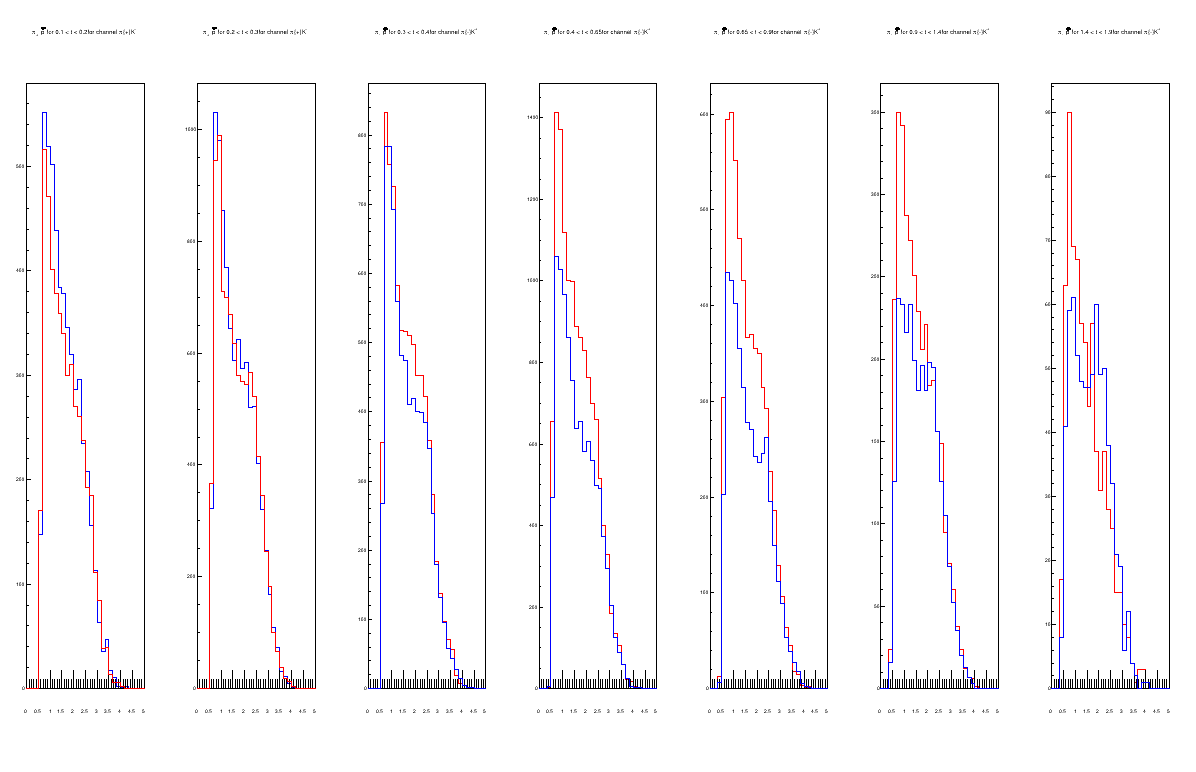

In [43]:
for i, (hist_pip, hist_pim) in enumerate(zip(pip1_p_hists, pim1_p_hists)):
    
    hist_pip.SetLineColor(ROOT.kBlue)
    hist_pim.SetLineColor(ROOT.kRed)
    c1.cd(i +1)
    sorted_hists = tools.sort_hists_by_max([hist_pip, hist_pim])
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
c1.Draw()

In [45]:
pip1_theta_hists = []
pim1_theta_hists = []
for t in constants.ALLOWED_T_BINS:
    t_range_string = f'{constants.T_CUT_DICT[t][0]} < t < {constants.T_CUT_DICT[t][1]}'
    pip1_theta_hist_spring = df_pipkmks_spring.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pipkmks_pip1_theta_t={t}_spring', '#pi_{+} Theta for ' + t_range_string + 'for channel #pi{+}K^{-}', 20, 0, 20), 'pip1_theta')
    pip1_theta_hist_fall = df_pipkmks_fall.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pipkmks_pip1_theta_t={t}_fall', '#pi_{+} Theta for ' + t_range_string + 'for channel #pi{+}K^{-}', 20, 0, 20), 'pip1_theta')
    pip1_theta_hist_2017 = df_pipkmks_2017.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pipkmks_pip1_theta_t={t}_2017', '#pi_{+} Theta for ' + t_range_string + 'for channel #pi{+}K^{-}', 20, 0, 20), 'pip1_theta')
    pim1_theta_hist_spring = df_pimkpks_spring.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pimkpks_pim1_theta_t={t}_spring', '#pi_{-} Theta for ' + t_range_string + 'for channel #pi{-}K^{+}', 20, 0, 20), 'pim1_theta')
    pim1_theta_hist_fall = df_pimkpks_fall.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pimkpks_pim1_theta_t={t}_fall', '#pi_{-} Theta for ' + t_range_string + 'for channel #pi{-}K^{+}', 20, 0, 20), 'pim1_theta')
    pim1_theta_hist_2017 = df_pimkpks_2017.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pimkpks_pim1_theta_t={t}_2017', '#pi_{-} Theta for ' + t_range_string + 'for channel #pi{-}K^{+}', 20, 0, 20), 'pim1_theta')

    pip1_theta_hist_total = pip1_theta_hist_spring.Clone(f'pipkmks_pip1_theta_t={t}_total')
    pip1_theta_hist_total.Add(pip1_theta_hist_fall.GetPtr())
    pip1_theta_hist_total.Add(pip1_theta_hist_2017.GetPtr())

    pim1_theta_hist_total = pim1_theta_hist_spring.Clone(f'pimkpks_pim1_theta_t={t}_total')
    pim1_theta_hist_total.Add(pim1_theta_hist_fall.GetPtr())
    pim1_theta_hist_total.Add(pim1_theta_hist_2017.GetPtr())

    pip1_theta_hists.append(pip1_theta_hist_total)
    pim1_theta_hists.append(pim1_theta_hist_total)

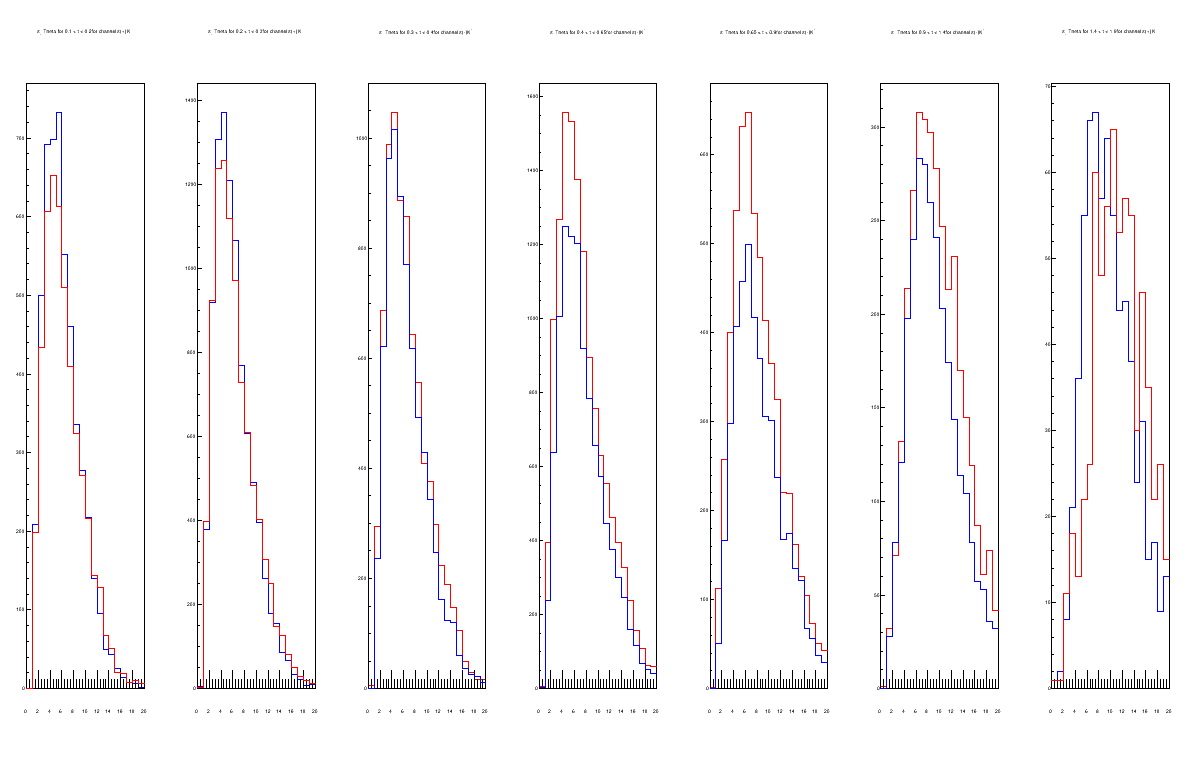

In [46]:
for i, (hist_pip, hist_pim) in enumerate(zip(pip1_theta_hists, pim1_theta_hists)):
    
    hist_pip.SetLineColor(ROOT.kBlue)
    hist_pim.SetLineColor(ROOT.kRed)
    c1.cd(i +1)
    sorted_hists = tools.sort_hists_by_max([hist_pip, hist_pim])
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
c1.Draw()